In [1]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Sample Media Spend Data.csv')

# EXPLORATORY ANALYSIS OF DATA:

### VISUALIZE THE DATASET

In [3]:
print(data.head(5))

  Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0        A      1/6/2018         392            422                 408   
1        A     1/13/2018         787            904                 110   
2        A     1/20/2018          81            970                 742   
3        A     1/27/2018          25            575                  65   
4        A      2/3/2018         565            284                 295   

   Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0        349895.0107                 73580                  12072   
1        506270.2176                 11804                   9499   
2        430042.1538                 52232                  17048   
3        417745.6658                 78640                  10207   
4        408505.8012                 40561                   5834   

   Overall_Views  Sales  
0            682  59417  
1            853  56806  
2            759  48715  
3            942  72047  
4   

In [4]:
data.describe()

,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
count,3051.000000,3051.000000,3.051000e+03,3.051000e+03,3.051000e+03,3051.000000,3051.000000,3.051000e+03
mean,15093.941658,13355.673222,8.861738e+05,7.605094e+05,2.691269e+05,22910.902655,27980.914127,1.859014e+05
std,30785.884979,24079.399689,1.355076e+06,6.260141e+05,4.665117e+05,21617.637497,52054.976687,2.322079e+05
min,1.000000,1.000000,7.000000e+00,4.089445e+04,2.900000e+01,910.000000,2.000000,1.543600e+04
25%,537.000000,712.500000,1.698280e+05,3.784969e+05,5.707350e+04,9127.000000,747.000000,7.339350e+04
50%,2699.000000,4110.000000,4.905310e+05,5.909708e+05,1.275230e+05,16658.000000,7879.000000,1.135730e+05
75%,17358.000000,16230.500000,1.022622e+06,9.622466e+05,2.835050e+05,27486.500000,34111.500000,2.029755e+05
max,518190.000000,270453.000000,1.715044e+07,7.317730e+06,7.558435e+06,175791.000000,635057.000000,3.575430e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


### MISSING VALUES ARE DROPPED:

In [6]:
data.dropna()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,1/13/2018,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,1/20/2018,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,1/27/2018,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2/3/2018,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


### DESCRIPTIVE STATISTICS USING BOX PLOT: EFFECT OF GOOGLE IMPRESSIONS ON SALES:

<AxesSubplot:xlabel='Google_Impressions', ylabel='Sales'>

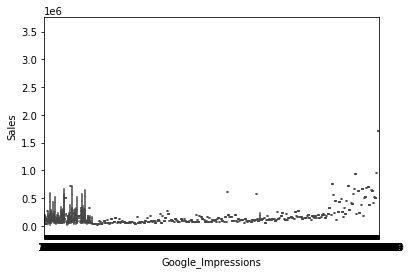

In [7]:
sns.boxplot(x="Google_Impressions",y="Sales",data=data)

### EFFECT OF EMAIL IMPRESSIONS ON SALES:

<AxesSubplot:xlabel='Email_Impressions', ylabel='Sales'>

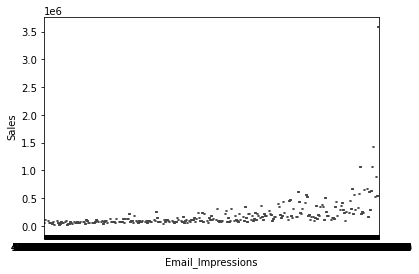

In [8]:
sns.boxplot(x="Email_Impressions",y="Sales",data=data)

### EFFECT OF FACEBOOK IMPRESSIONS ON SALES:

<AxesSubplot:xlabel='Facebook_Impressions', ylabel='Sales'>

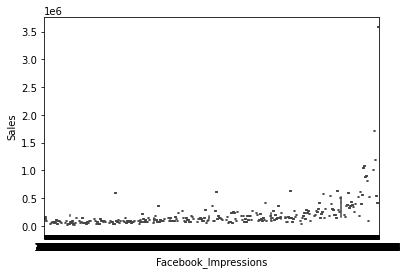

In [9]:
sns.boxplot(x="Facebook_Impressions",y="Sales",data=data)

### SCATTER PLOT ANALYSIS :

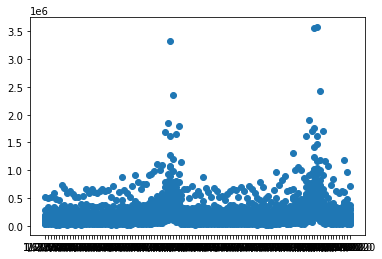

In [10]:
x=data["Calendar_Week"]
y=data["Sales"]
plt.scatter(x,y)

### ANALYSING CORELATION OF OTHER COLUMN WITH SALES USING HEATMAP:

#### ANALYSIS OF PAID VIEWS OF DIVISIONS OVER SALES

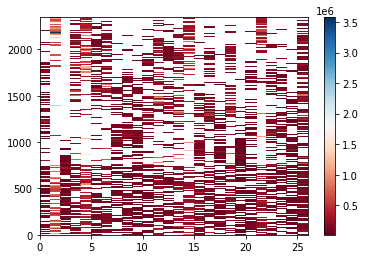

In [11]:
data_pivot=data.pivot_table(values='Sales',index='Paid_Views',columns='Division')	
plt.pcolor(data_pivot,cmap='RdBu')
plt.colorbar()
plt.show()